In [1]:
!pip install duckduckgo_search
!pip install ipywidgets
from fastai.vision.all import *
from fastai.vision.widgets import *

You should consider upgrading via the '/Users/cjan/golark/plantspeciesdetector/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/cjan/golark/plantspeciesdetector/venv/bin/python3 -m pip install --upgrade pip' command.


/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import * 

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [3]:
# list of plant species
plant_species = [
    'Rose', 'Tulip', 'Daisy', 'Sunflower', 'Lily', 'Orchid',
    'Cactus', 'Fern', 'Bamboo', 'Palm', 'Maple', 'Oak',
    'Pine', 'Cherry Blossom', 'Lavender', 'Hibiscus',
    'Jasmine', 'Marigold', 'Peony', 'Begonia', 'Aloe Vera',
    'Ivy', 'Moss', 'Carnation', 'Poppy', 'Snapdragon',
    'Azalea', 'Camellia', 'Chrysanthemum', 'Daffodil',
    'Gardenia', 'Hydrangea', 'Magnolia', 'Petunia',
    'Rhododendron', 'Violet', 'Zinnia', 'Geranium'
]

path = Path('plantimages')

In [3]:
for plant in plant_species:
    dest = (path/plant)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{plant} plant photo'))
    time.sleep(5)
    resize_images(path/plant, max_size=400, dest=path/plant)


/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


In [5]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/cjan/golark/plantspeciesdetector/venv/lib/python3.9/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


108

In [4]:
path = Path('plantimages')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

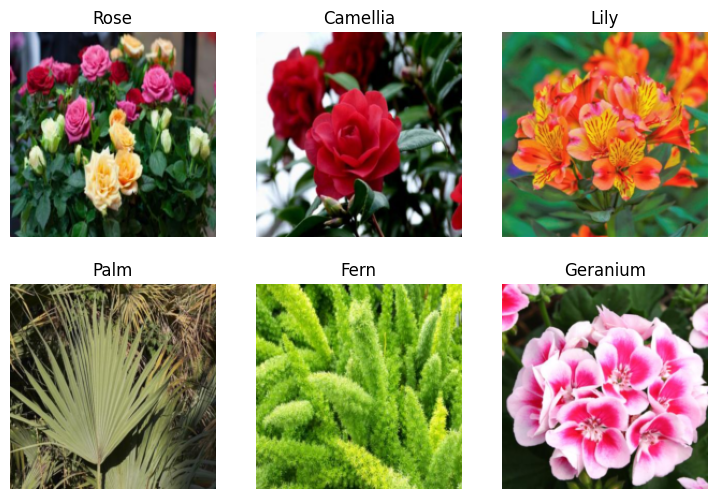

In [5]:
dls.show_batch(max_n=6)

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

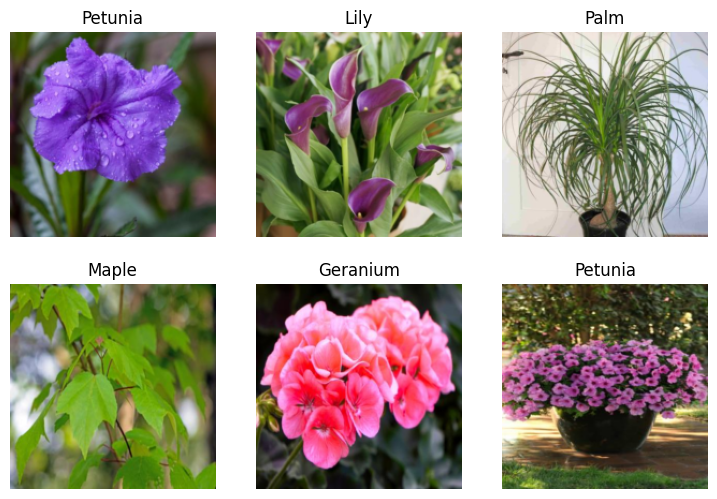

In [9]:
# show batch from training set
dls.train.show_batch(max_n=6)


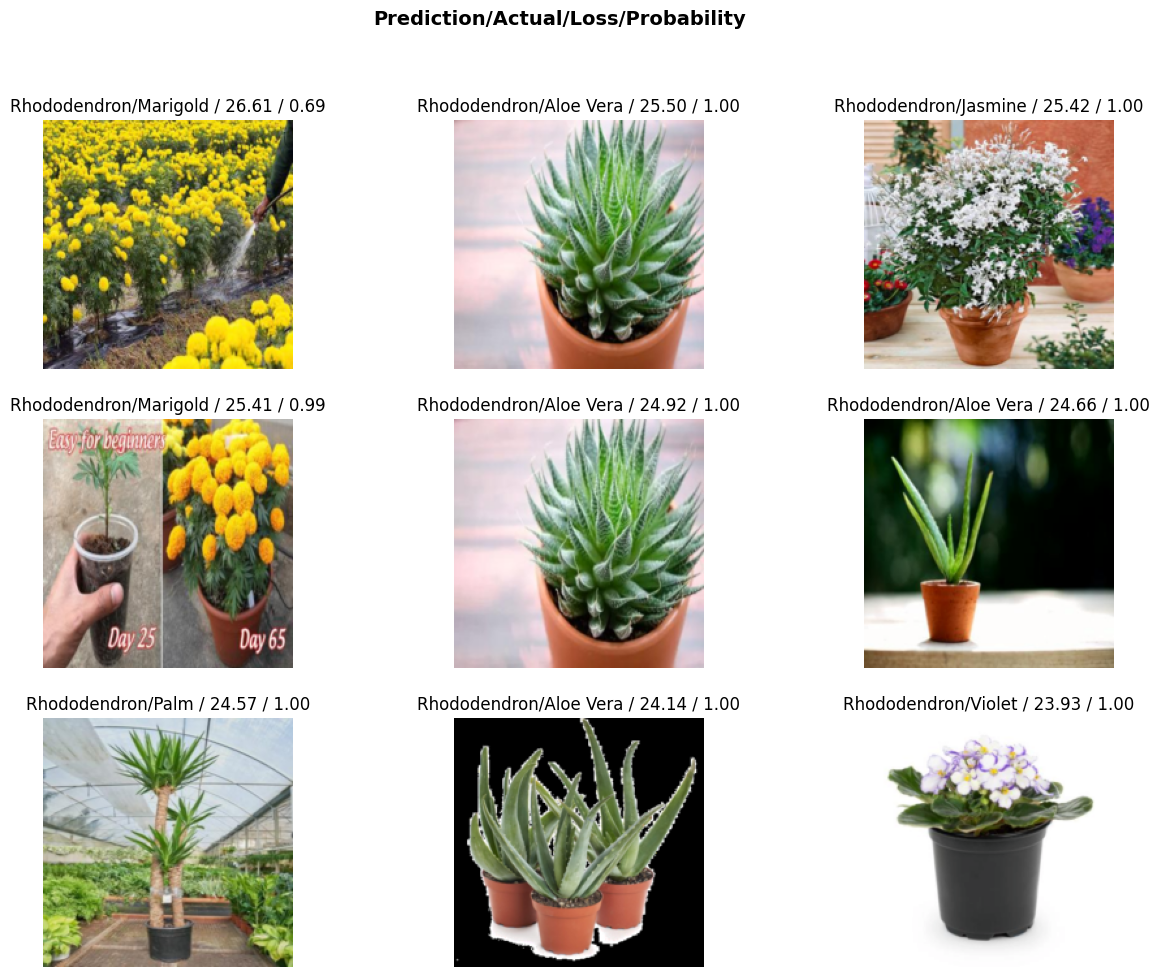

In [10]:
# get top losses
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15, 11))

In [11]:
# fine tune the model
learn.fine_tune(5)

In [14]:
# validation error rate
learn.validate()

(#2) [0.9618913531303406,0.2530730366706848]

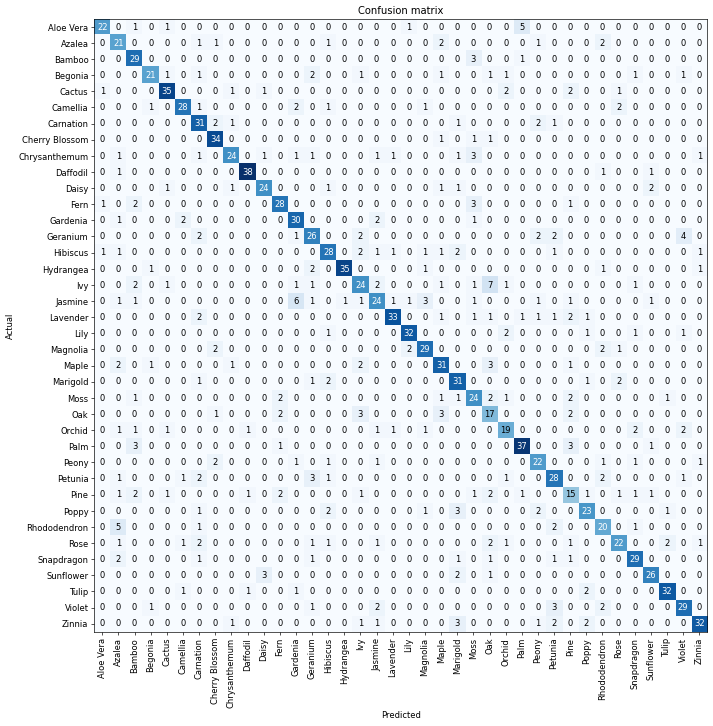

In [12]:
# confusion matrix
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [7]:
# import local model
learn = load_learner('plant_species_model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'plant_species_model.pkl'

In [13]:
# save the model
learn.export('plant_species_model.pkl')